In [12]:
import numpy as np
from neuraldistributions.datasets import static
import os
from multiprocessing import Pool
import torch

In [13]:
torch.manual_seed(42)

In [14]:
data_source = 'static21067-10-18-GrayImageNet-94c6ff995dac583098847cfecd43e7b6.zip'
static.unzip(f'../project/data/{data_source}')
data_list = os.listdir('../project/data/static21067-10-18-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/data/responses')
image_list = os.listdir('../project/data/static21067-10-18-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/data/images')

In [15]:
import shutil
if os.path.exists('../project/data/static_edited_dsampled/'):
    shutil.rmtree(f'../project/data/static_edited_dsampled')
shutil.copytree(f'../project/data/{data_source.split(".zip")[0]}', f'../project/data/static_edited_dsampled')
shutil.rmtree(f'../project/data/static_edited_dsampled/data/responses')
shutil.rmtree(f'../project/data/static_edited_dsampled/data/images')
os.mkdir('../project/data/static_edited_dsampled/data/responses/')
os.mkdir('../project/data/static_edited_dsampled/data/images/')

In [16]:
def tranform_data(file):
    array = np.load('../project/data/static21067-10-18-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/data/responses/' + file)
    array_edited = np.where(array<np.e**-10, torch.atanh(-torch.rand(array.shape)), array-np.e**-10).reshape(len(array))
    np.save('../project/data/static_edited_dsampled/data/responses/' + file, array_edited, allow_pickle=False)

In [17]:
import cv2
def downsample_image(file):
    image = np.load('../project/data/static21067-10-18-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/data/images/' + file)
    np.save('../project/data/static_edited_dsampled/data/images/' + file, cv2.resize(image[0], (64, 36), interpolation=cv2.INTER_AREA).astype(
        np.float32
    ).reshape(1,36, 64), allow_pickle=False)

In [18]:
#np.random.seed(42)
#torch.manual_seed(42)
with Pool(processes=1) as pool:
    pool.map(tranform_data, data_list)
    pool.map(downsample_image, image_list)

In [19]:
print(len(os.listdir('../project/data/static_edited_dsampled/data/responses')) == len(data_list))

True


In [20]:
responses = []
dir = "../project/data/static_edited_dsampled/data/responses"
files = os.listdir(dir)
for file in files:
    data = np.load(f"{dir}/{file}").tolist()
    responses.append(data)

In [21]:
responses_np = np.array(responses)

(-5.0, 10.0)

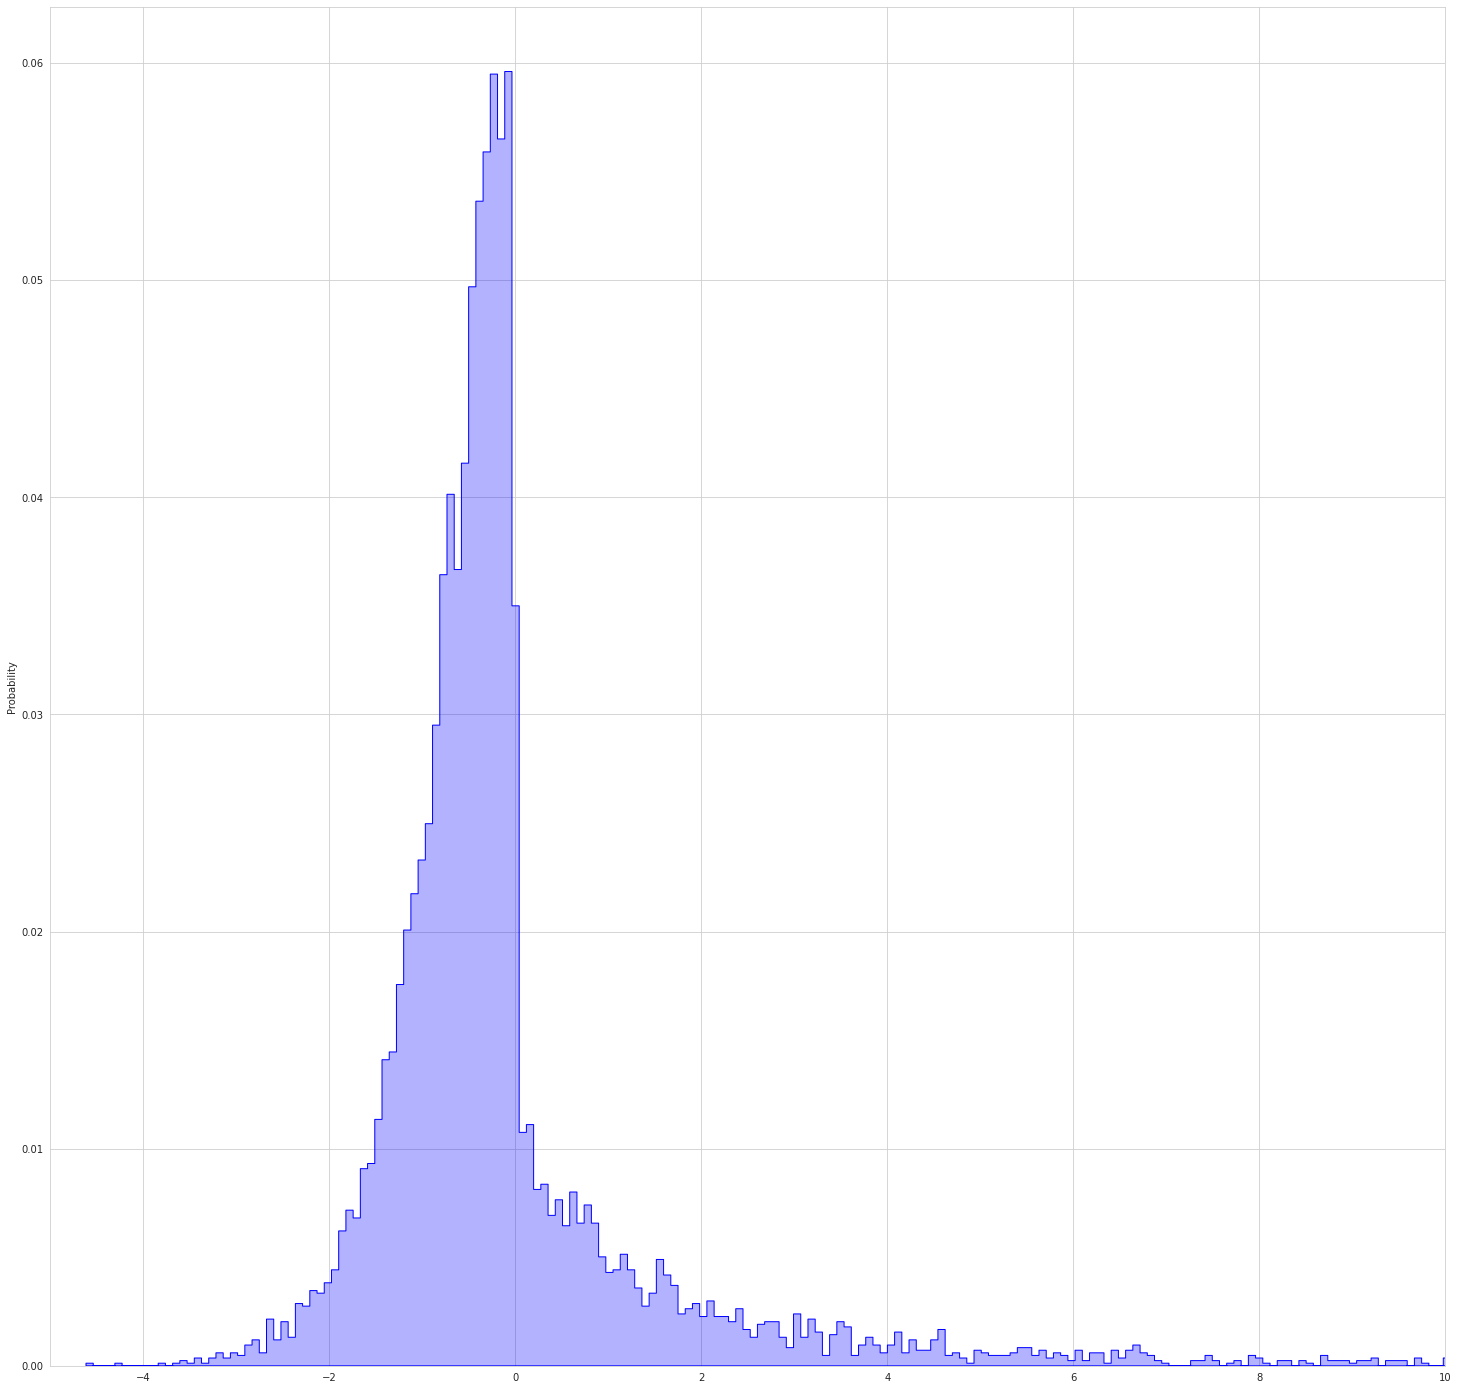

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
fix, ax = plt.subplots(1,1, figsize=(25,25))
sns.histplot(responses_np[0],ax = ax, stat="probability", element="step", color="blue", alpha=0.3)
ax.set_xlim(-5, 10)
